In [11]:
from utils import Dataloader
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [12]:
def load_ratings(path):
    COL_NAME = ['userId','movieId','rating','timestamp']
    df = pd.read_csv(os.path.join(path,"ratings.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

def load_movies(path):
    COL_NAME = ['movieId','title','genres']
    df = pd.read_csv(os.path.join(path,"movies.dat"),sep='::', header=None, engine='python', names=COL_NAME, encoding = 'ISO-8859-1' )
    return df

def load_users(path):
    COL_NAME = ['userId','gender','age','Occupation','zip_code']
    df = pd.read_csv(os.path.join(path,"users.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

In [13]:
#데이터 폴더 경로
DIR_PATH = "./datasets/"

#데이터 호출
users_df = Dataloader.load_users(DIR_PATH)
ratings_df = Dataloader.load_ratings(DIR_PATH)
movies_df = Dataloader.load_movies(DIR_PATH)

In [14]:
user_rating_df = pd.merge(users_df, ratings_df, on='userId')
user_movie_rating_df = pd.merge(user_rating_df, movies_df, on='movieId')

In [15]:
user_movie_rating_df_top = user_movie_rating_df.copy()

user_movie_rating_df_top['genres'] = user_movie_rating_df['genres'].str.split('|')

user_movie_rating_df_top

user_movie_rating_expanded = user_movie_rating_df_top.explode('genres')
user_movie_rating_expanded

,userId,gender,age,Occupation,zip_code,movieId,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Western


In [31]:
# 'year' 열에 연도 정보 추출하여 추가
user_movie_rating_expanded['year'] = user_movie_rating_expanded['title'].str.extract(r'\((\d{4})\)')

# 연도 정보가 포함된 제목 수정
user_movie_rating_expanded['title'] = user_movie_rating_expanded['title'].str.replace(r'\s*\(\d{4}\)', '')

year_bins = np.arange(1910, 2010, 10)
year_groups = pd.cut(user_movie_rating_expanded['year'].astype(int), bins=year_bins)

def categorize_decade(year):
    decade_start = (year // 10) * 10
    return f"{decade_start}s"


user_movie_rating_expanded['decade'] = user_movie_rating_expanded['year'].apply(lambda x: categorize_decade(int(x)) if x else None)

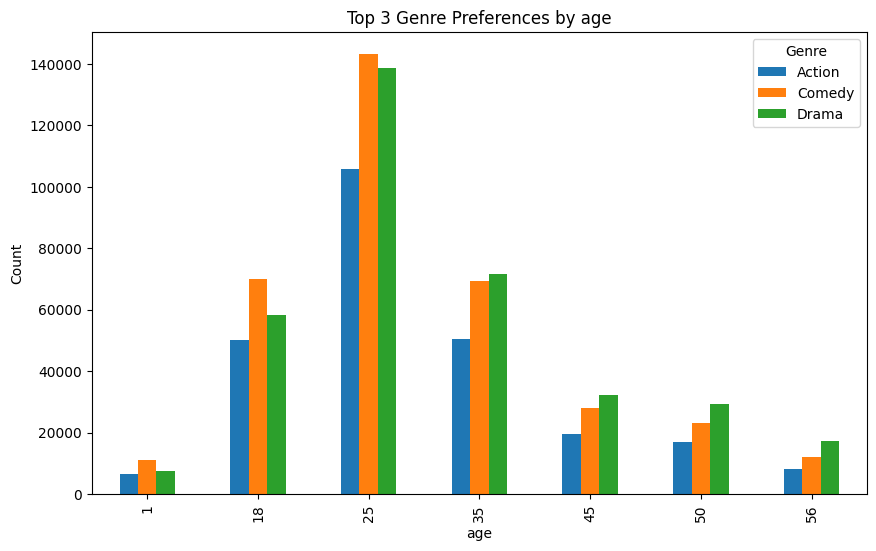

In [17]:
age_genre_rating = user_movie_rating_expanded.groupby(['age', 'genres']).size().unstack()
top_3_genres_by_age = age_genre_rating.apply(lambda row: row.sort_values(ascending=False).head(3), axis=1)

top_3_genres_by_age.plot(kind='bar', figsize=(10, 6))
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Top 3 Genre Preferences by age')
plt.legend(title='Genre')

plt.show()

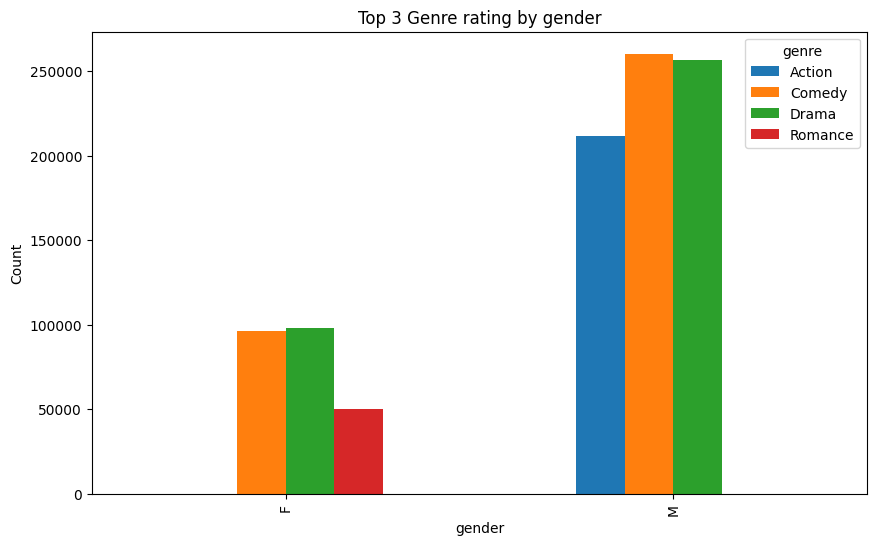

In [18]:
gender_genre_rating = user_movie_rating_expanded.groupby(['gender', 'genres']).size().unstack()

# 높은 빈도의 장르 3개 선택
top_3_genres_by_gender = gender_genre_rating.apply(lambda row: row.sort_values(ascending=False).head(3), axis=1)

# 데이터 시각화
top_3_genres_by_gender.plot(kind='bar', figsize=(10, 6))
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Top 3 Genre rating by gender')
plt.legend(title='genre')

plt.show()

In [25]:
user_movie_rating_expanded

,userId,gender,age,Occupation,zip_code,movieId,rating,timestamp,title,genres,year,decade
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970s
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970s
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970s
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970s
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1970s
...,...,...,...,...,...,...,...,...,...,...,...,...
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama,1999,1990s
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy,1973,1970s
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Drama,1973,1970s
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Western,1973,1970s


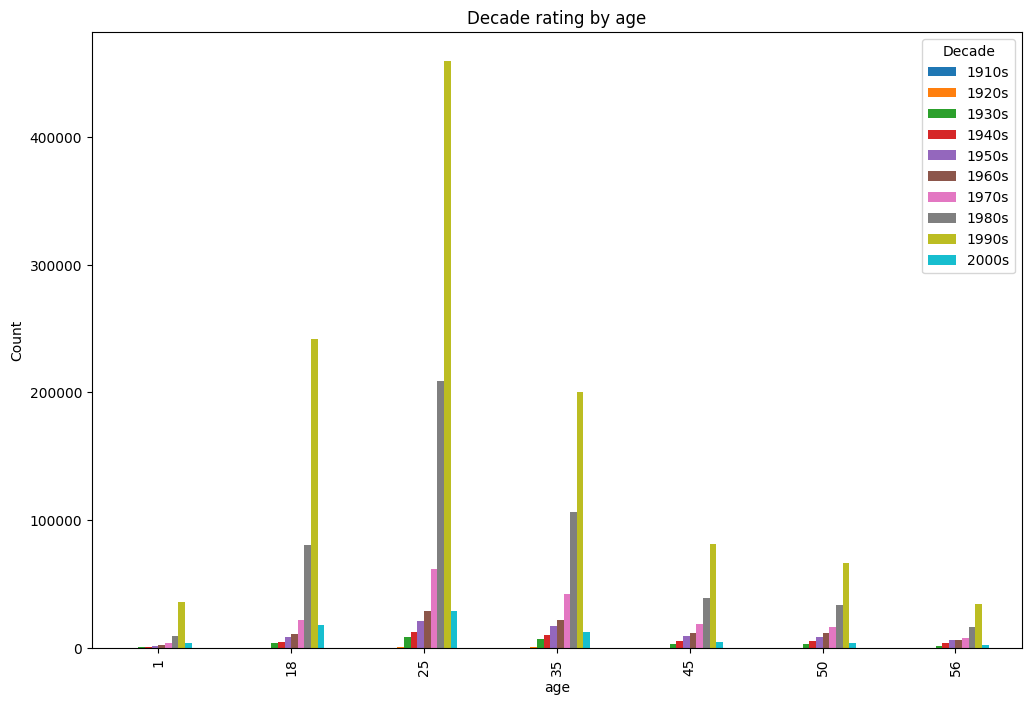

In [39]:
age_decade_rating.plot(kind='bar', figsize=(12, 8))
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Decade rating by age')
plt.legend(title='Decade')

plt.show()

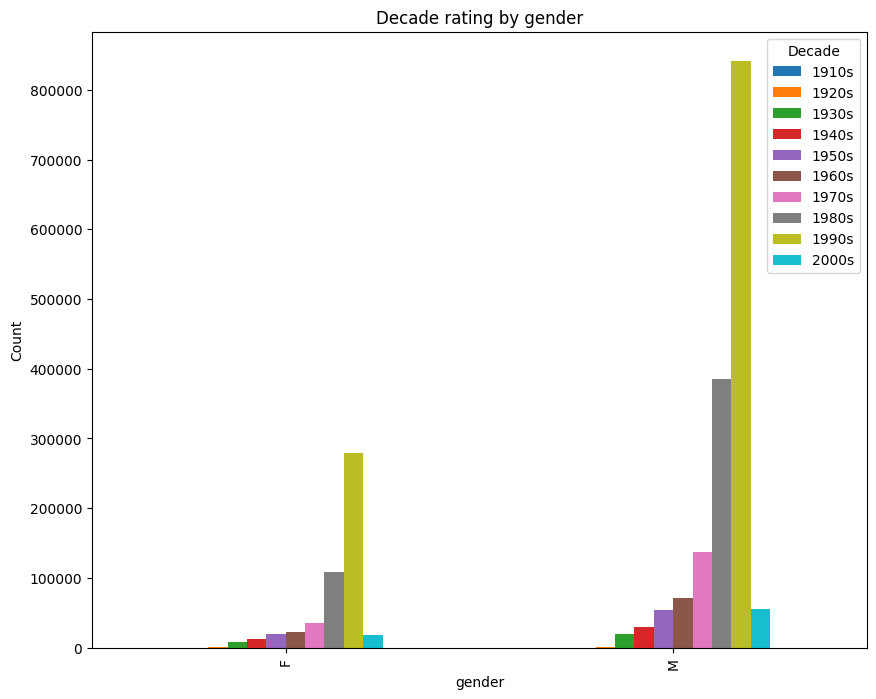

In [41]:
gender_decade_rating = user_movie_rating_expanded.groupby(['gender', 'decade']).size().unstack()

gender_decade_rating.plot(kind='bar', figsize=(10, 8))
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Decade rating by gender')
plt.legend(title='Decade')

plt.show()